<a href="https://colab.research.google.com/github/phoenix2000/NNFL/blob/main/NNFL_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1PCi4oq0jPcwipe3qKV3Wr6N7La1Ffi-a'}) 
downloaded.GetContentFile('training_output.xlsx')
downloaded = drive.CreateFile({'id':'1MoqnataPMfrGfLyLZ2FWWIXLSctWJQgW'}) 
downloaded.GetContentFile('test_output.xlsx')
downloaded = drive.CreateFile({'id':'1K2q1GW_PXa9OF_9B5AWCBtF1ydq9AL-z'}) 
downloaded.GetContentFile('training_feature_matrix.xlsx')
downloaded = drive.CreateFile({'id':'1u-mUX_4ERXJnCTdu3aeQIOiNfAwVqyDq'}) 
downloaded.GetContentFile('test_feature_matrix.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

training_output=pd.read_excel('training_output.xlsx')
test_output=pd.read_excel('test_output.xlsx')
training_feature_matrix=pd.read_excel('training_feature_matrix.xlsx')
test_feature_matrix=pd.read_excel('test_feature_matrix.xlsx')

In [ ]:
w=np.zeros((1,3))

In [ ]:
x=training_feature_matrix.to_numpy()
y=training_output.to_numpy()
x_bar=np.mean(x,axis=0)
x_std=np.std(x,axis=0)
x_new=(x-x_bar)/(x_std)
column_of_ones=np.ones(244).T
x_new2=np.insert(x_new, 0,column_of_ones, axis=1)
y_bar=np.mean(y,axis=0)
y_std=np.std(y,axis=0)
y_new=(y-y_bar)/(y_std)

In [ ]:
x_test=test_feature_matrix.to_numpy()
y_test=test_output.to_numpy()
x_test_new=(x_test-x_bar)/(x_std)
ones_column=np.ones(103)
x_test_new2=np.insert(x_test_new,0,ones_column, axis=1)
y_test_new=(y_test-y_bar)/(y_std)

In [ ]:
def cost_func(x,y,w):
  J=0
  for i in range(244):
    J=J+(0.5/m)*(np.dot(w,x[i].T)-y[i])**2
  return J

def gradient(X,Y,batch_size,w):
  for i in range(m):
    for j in range(batch_size):
        grad=(np.dot(w,X[i].T)-Y[i])*X[i,j]
  return grad

In [ ]:
def create_minibatches(x,y,batch_size):
  i=0
  mini_batches=[]
  data=np.hstack((x,y))
  np.random.shuffle(data)
  number_rows=data.shape[0]

  for i in range(int((number_rows+1)/batch_size)):
    mini_batch=data[i*batch_size:(i+1)*batch_size,:]
    x_minibatch=mini_batch[:,:-1]
    y_minibatch=mini_batch[:,-1].reshape((-1,1))
    mini_batches.append((x_minibatch,y_minibatch))
  if number_rows % batch_size!=0:
    mini_batch=data[i*batch_size:number_rows]
    x_minibatch=mini_batch[:,:-1]
    y_minibatch=mini_batch[:-1].reshape((-1,1))
    mini_batches.append((x_minibatch,y_minibatch))
    #new=np.array(mini_batches)
  return np.array(mini_batches).shape

In [ ]:
create_minibatches(x_new2,y_new,10)

(25, 2)

In [ ]:
m,n=np.shape(x_new2)
w=np.zeros((1,3))
W=np.zeros((m,3))
JJ=np.zeros((m,1))
def gradient_descent(x,y,batch_size,alpha,iterations):
  mse=0
  W[0,0]=w[0,0]
  W[0,1]=w[0,1]
  W[0,1]=w[0,1]
  for i in range(iterations):
    mini_batches=create_minibatches(x,y,batch_size)
  
  for mini_batch in mini_batches:
    x_minibatch,y_minibatch=mini_batch
    for j in range(3):
          w[0,j]=w[0,j]-alpha*gradient(x_minibatch,y_minibatch,batch_size,w[0,j])  
    W[mini_batch]=w
    JJ[mini_batch]=cost_func(x,y,w)
    plt.plot(JJ)
  return JJ

In [ ]:
gradient_descent(x_new2,y_new,2,0.001,100)

ValueError: ignored

In [ ]:
m,n=np.shape(x_new2)
w2=np.zeros((1,3))
W2=np.zeros((m,3))
JJ2=np.zeros((m,1))
def gradient_descentsto(X,Y,alpha):
  mse=0
  W2[0,0]=w2[0,0]
  W2[0,1]=w2[0,1]
  W2[0,1]=w2[0,1]

  for i in range(m):
    for j in range(3):
      w2[0,j]=w2[0,j]-alpha*(np.dot(w,X[i].T)-Y[i])*X[i,j]
    W2[i]=w2
    JJ[i]=cost_func(X,Y,w2)
  for i in range(m):
    diff_square=(np.dot(w2,X[i].T)-Y)**2
    mse=mse+diff_square
  mse=mse/m
  plt.plot(JJ)
  a=np.array(W2[:,0])
  b=np.array(W2[:,1])
  c=np.array(W2[:,2])
  return (mse[m-1])
  



array([2.16665568])

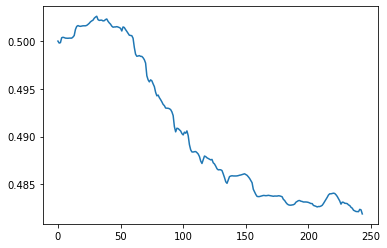

In [ ]:
gradient_descentsto(x_new2,y_new,0.001)

In [ ]:
def test_modelsto(x,y):
  m,n=np.shape(x_test_new2)
  predicted_values=np.zeros((m,1))
  mse=0
  for i in range(m):
    predicted_values[i]= W2[m-1,0]*x[i,0]+W2[m-1,1]*x[i,1]+W2[m-1,2]*x[i,2]
  for i in range(m):
    diff_square=(predicted_values[i]-y[i])**2
    mse=mse+diff_square
  mse=mse/m
  print("MSE=")
  return mse[0]

In [ ]:
test_modelsto(x_test_new2,y_test_new)

MSE=


3.0625952990915177